<a href="https://colab.research.google.com/github/FlorianSong/MResAMS_DataAnalytics/blob/main/Workshop3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analytics 2022

### Workshop 3 &ndash; Unsupervised Learning: Dimensionality reduction and Clustering &ndash; 10th November 2020
##### Taught by: Nan Wu, Wilson Wu, Florian Song, Linden Schrecker, Annabel Basford, Sophia Yaliraki

Much of today's workshop was taken from https://github.com/ageron/handson-ml2/ which in turn is based on the second edition of an O'Reilly book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Geron.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os


import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

from sklearn.datasets import make_swiss_roll, load_iris, fetch_openml, make_blobs, load_wine, make_moons, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

### In-class challenge 1

- Once again, we make use of the `wine` dataset consisting of 13 constituents found in each of three types of wines from different cultivars. 
- Set up a `PCA` on this data set. How much of the variance is explained through the first two principal axes? How many axes do you need to reach 95% of the variance? *Hint if things don't look quite right:* Did you scale your data?
- Plot the raw data (e.g. the Alcohol and Hue predictors) alongside the first two PCA axes. 

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


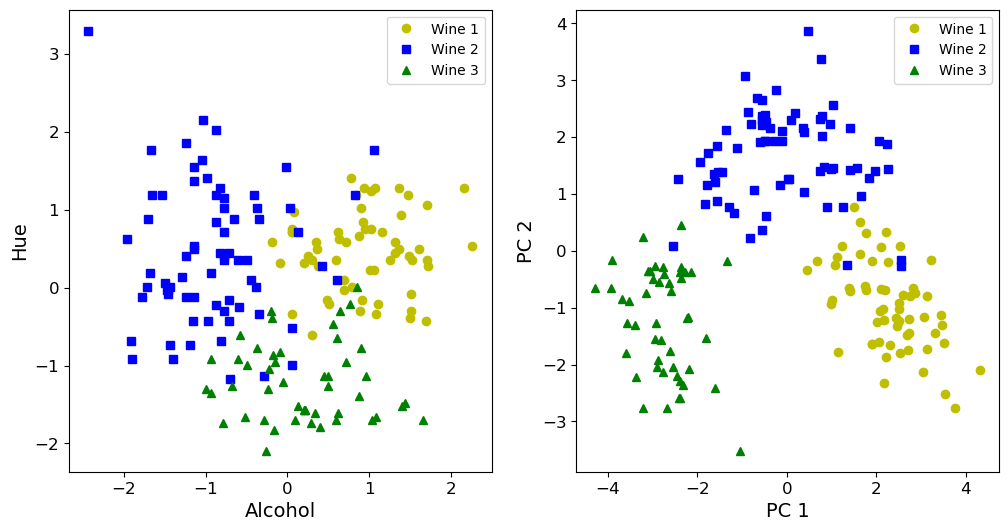

In [176]:
# 3, 2, 1, code!

X_wine, y_wine = load_wine(return_X_y = True)

X_wine = StandardScaler().fit_transform(X_wine)
pca = PCA(n_components = 0.95)
X_95 = pca.fit_transform(X_wine)

print(pca.explained_variance_ratio_)

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.plot(X_wine[:, 0][y_wine == 0], X_wine[:, 10][y_wine == 0], 'yo', label = 'Wine 1')
plt.plot(X_wine[:, 0][y_wine == 1], X_wine[:, 10][y_wine == 1], 'bs', label = 'Wine 2')
plt.plot(X_wine[:, 0][y_wine == 2], X_wine[:, 10][y_wine == 2], 'g^', label = 'Wine 3')
plt.legend()
plt.xlabel('Alcohol')
plt.ylabel('Hue')

plt.subplot(122)
plt.plot(X_95[:, 0][y_wine == 0], X_95[:, 1][y_wine == 0], 'yo', label = 'Wine 1')
plt.plot(X_95[:, 0][y_wine == 1], X_95[:, 1][y_wine == 1], 'bs', label = 'Wine 2')
plt.plot(X_95[:, 0][y_wine == 2], X_95[:, 1][y_wine == 2], 'g^', label = 'Wine 3')
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

### In-class challenge 2

<img src="https://cs.nyu.edu/~roweis/data/olivettifaces.gif" alt="olivetti" width="30%" style="float: right; margin-left: 2%;"/>

- For the final in-class challenge today, we are doing some facial recognition!
- To this end, you have been given some code to start you off with the all-time popular `Olivetti` faces dataset, consisting of 400 picture, 10 pictures of each of 40 people. More information can be found by calling `print(olivetti.DESCR)` or [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html).
- As you can see, the olivetti object contains three datasets: `data`, `images` and `target`. The `images` data simply contains a 400x64x64 array describing 400 black-white images with 64 pixels wide and 64 pixels high. You can use this alongside the command `plt.imshow(..., cmap="gray")` to visualise the image in grayscale. The `data` contains a 400x4096 matrix, which is just the flattened version of the above. Finally the `target` vector describes the ground truth and contains `0` for the first person, `1` for the second person, and so on. 
- Use `KMeans` to cluster the data. Extract the cluster labels and visualise the pictures belonging to a cluster. *Hint:* You might find the function `np.where(<condition>)` useful. 
- Do you see similar faces in each cluster? What happens when you vary the number of clusters in K-Means?

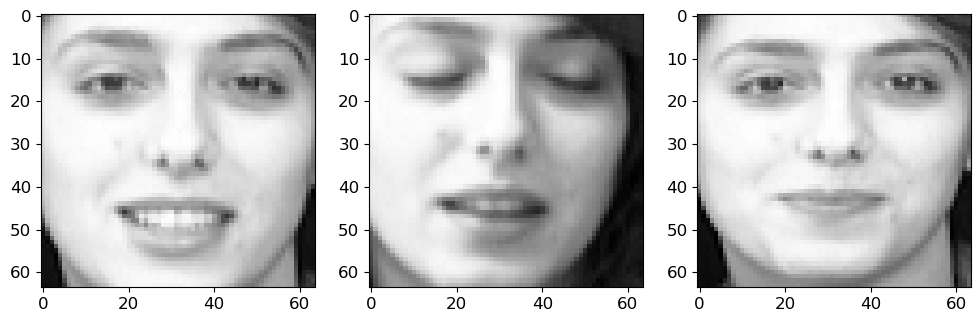

In [247]:
olivetti = sklearn.datasets.fetch_olivetti_faces()
data, images, target = olivetti['data'], olivetti['images'], olivetti['target']
# print(olivetti.DESCR)

plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.imshow(images[75], cmap = 'gray')
plt.subplot(132)
plt.imshow(images[76], cmap = 'gray')
plt.subplot(133)
plt.imshow(images[77], cmap = 'gray')

plt.show()

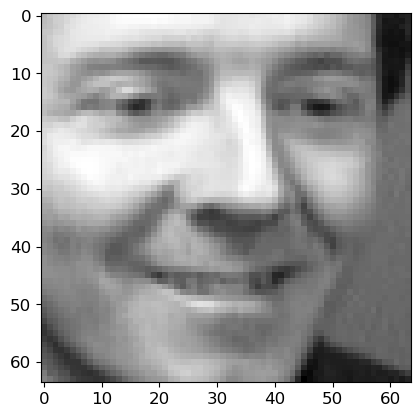

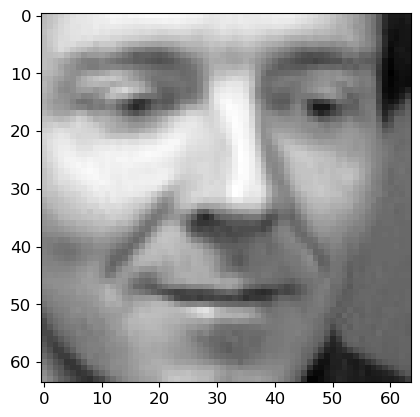

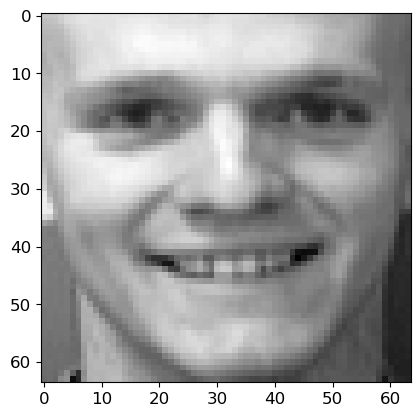

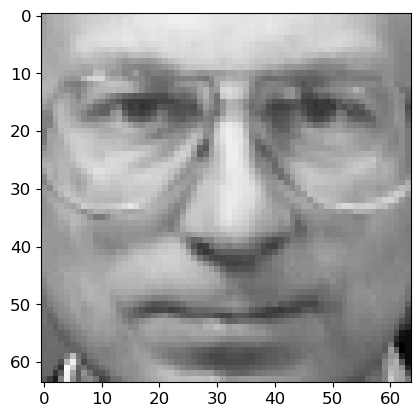

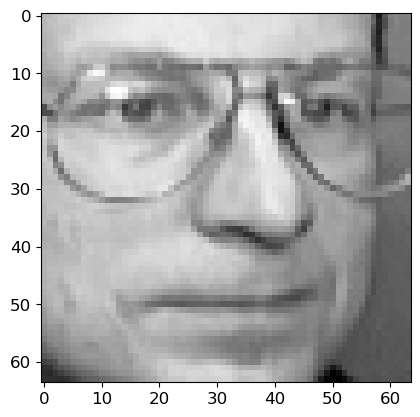

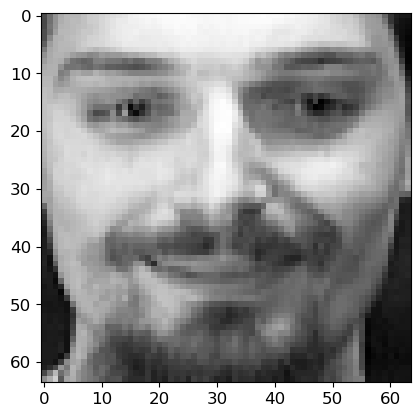

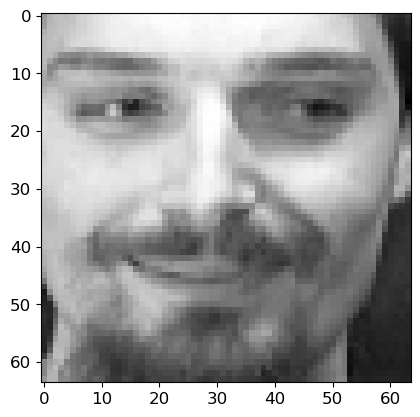

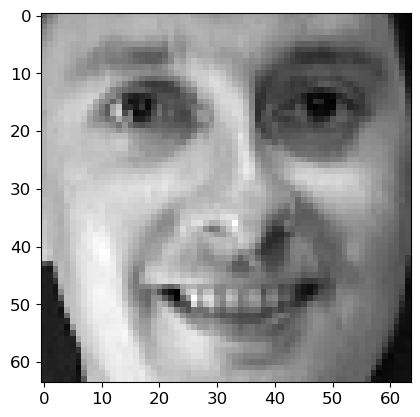

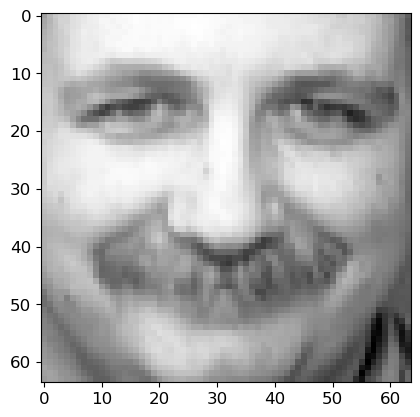

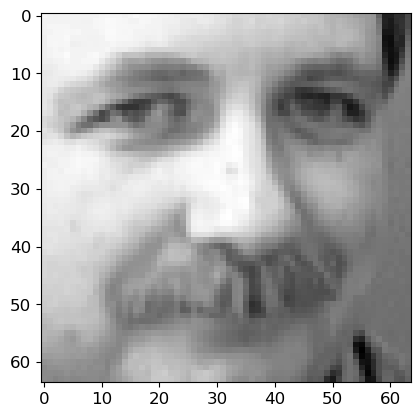

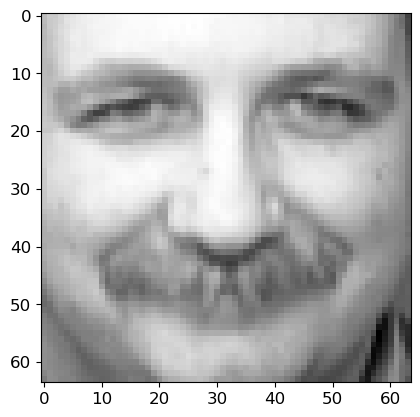

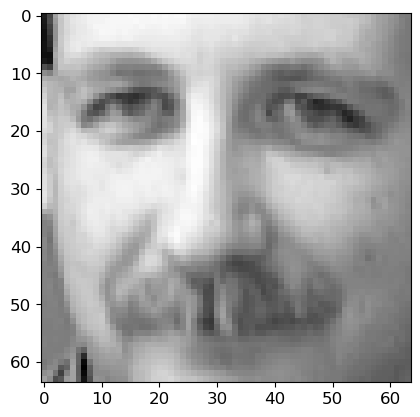

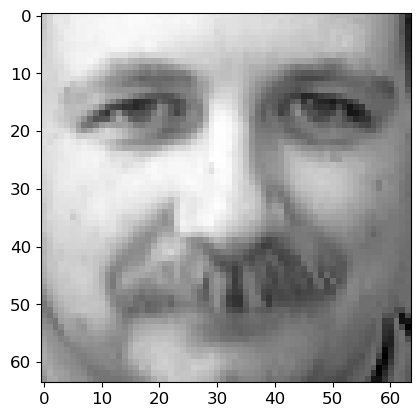

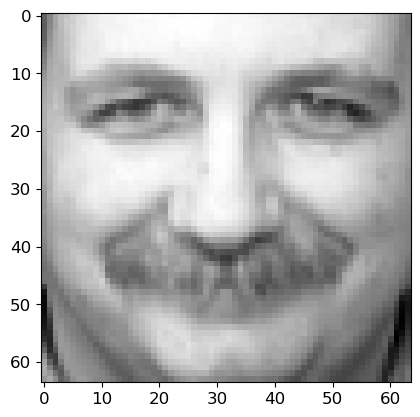

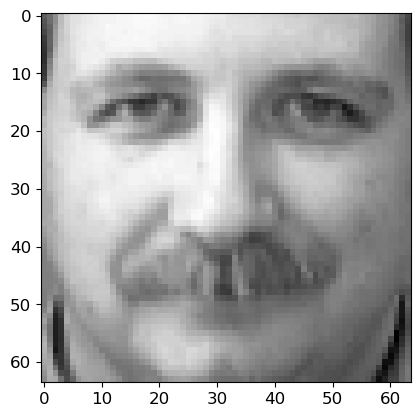

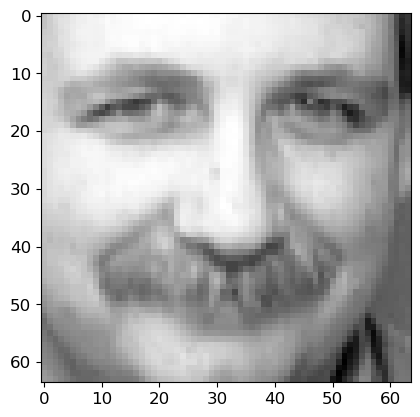

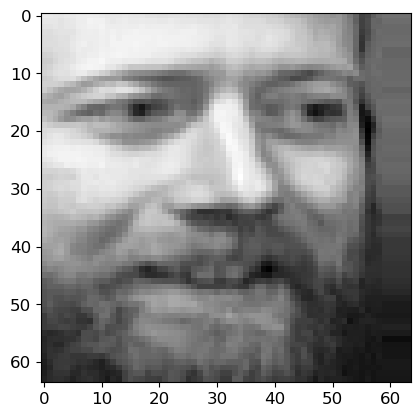

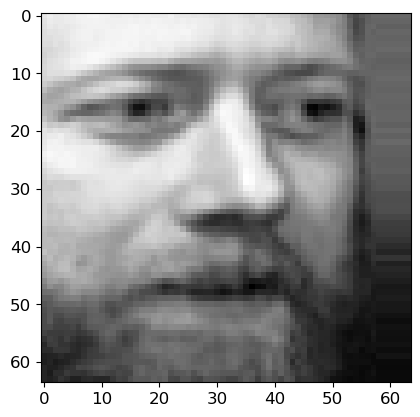

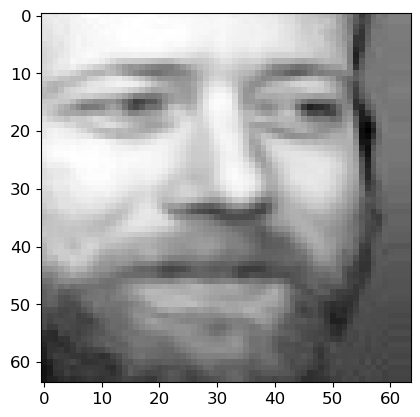

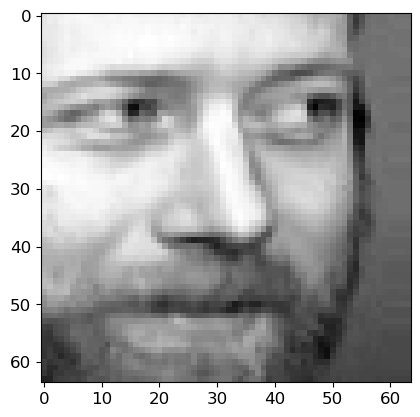

In [258]:
# 3, 2, 1, code!

olivetti = sklearn.datasets.fetch_olivetti_faces()
data, images, target = olivetti['data'], olivetti['images'], olivetti['target']

kmeans = KMeans(40)
kmeans.fit(data)

for i in np.where(kmeans.labels_ == 3)[0]:
    plt.imshow(images[i], cmap = 'gray')
    plt.show()